# Import from Libraries

In [178]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## Import data

In [179]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
solution = pd.read_csv('data/sample_sol.csv', index_col=False)

## Check some basic information on test data

In [180]:
print('Dimensions:', train.shape, '\n')
print('Types:', train.dtypes, '\n')
print('Missing Values:', train.isnull().sum(), '\n')

train.head(1000)

Dimensions: (13035, 12) 

Types: season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object 

Missing Values: season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64 



,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
1,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
2,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
3,1,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
4,1,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
5,1,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
6,1,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14
7,1,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537,36
8,1,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84
9,1,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,94


## Check if some values are entered incorrectly

In [181]:
print(train.loc[train['mnth'] == 0], '\n')
print(train.loc[train['season'] == 0], '\n')

Empty DataFrame
Columns: [season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, cnt]
Index: [] 

Empty DataFrame
Columns: [season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, cnt]
Index: [] 



In [182]:
train.corr()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,0.827196,-0.000419,-0.010078,-0.005052,0.015937,-0.009964,0.311040,0.318805,0.150011,-0.143865,0.177685
mnth,0.827196,1.000000,-0.001590,0.021632,0.008748,-0.002201,0.011915,0.197312,0.203875,0.163937,-0.127921,0.118684
hr,-0.000419,-0.001590,1.000000,0.005858,-0.009208,-0.009144,-0.024430,0.141853,0.138453,-0.278729,0.136494,0.394191
holiday,-0.010078,0.021632,0.005858,1.000000,-0.103690,-0.251099,-0.021671,-0.024809,-0.027825,-0.012484,0.004177,-0.029938
weekday,-0.005052,0.008748,-0.009208,-0.103690,1.000000,0.024178,0.000939,-0.002152,-0.008360,-0.039128,0.009145,0.027766
workingday,0.015937,-0.002201,-0.009144,-0.251099,0.024178,1.000000,0.050495,0.052084,0.051951,0.020971,-0.007265,0.020444
weathersit,-0.009964,0.011915,-0.024430,-0.021671,0.000939,0.050495,1.000000,-0.095804,-0.098083,0.415143,0.031185,-0.142286
temp,0.311040,0.197312,0.141853,-0.024809,-0.002152,0.052084,-0.095804,1.000000,0.987999,-0.075050,-0.016569,0.406540
atemp,0.318805,0.203875,0.138453,-0.027825,-0.008360,0.051951,-0.098083,0.987999,1.000000,-0.057447,-0.055100,0.403033
hum,0.150011,0.163937,-0.278729,-0.012484,-0.039128,0.020971,0.415143,-0.075050,-0.057447,1.000000,-0.285831,-0.322821


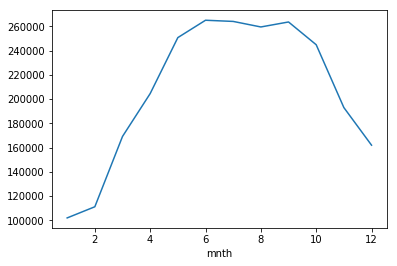

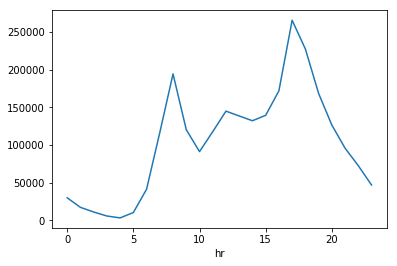

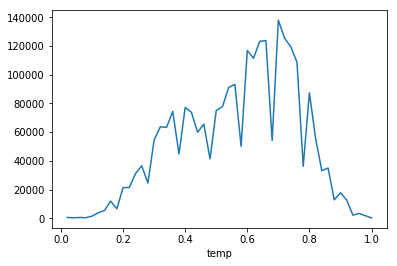

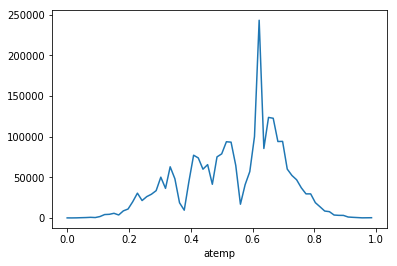

In [183]:
train.groupby('mnth').cnt.sum().plot()
plt.show()

train.groupby('hr').cnt.sum().plot()
plt.show()

train.groupby('temp').cnt.sum().plot()
plt.show()

train.groupby('atemp').cnt.sum().plot()
plt.show()

## Check for outliers

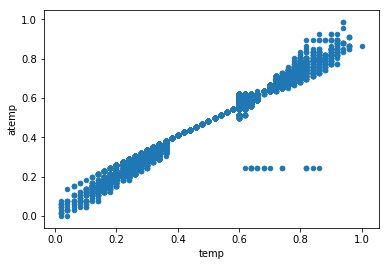

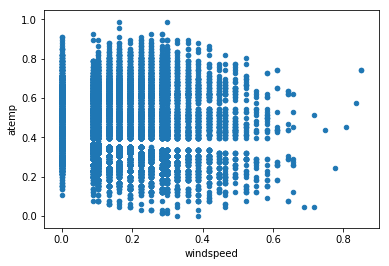

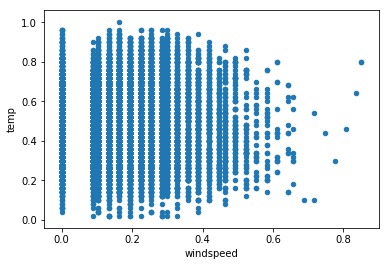

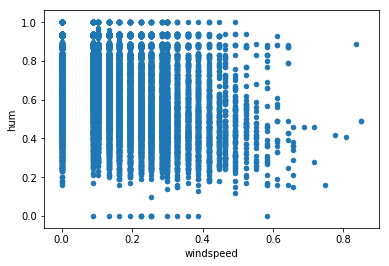

In [186]:
tempAndAtemp = train[['temp', 'atemp']]
tempAndAtemp.plot.scatter(x = 'temp', y = 'atemp')

windspeedAndAtemp = train[['windspeed', 'atemp']]
windspeedAndAtemp.plot.scatter(x = 'windspeed', y = 'atemp')

windspeedAndtemp = train[['windspeed', 'temp']]
windspeedAndtemp.plot.scatter(x = 'windspeed', y = 'temp')

windspeedAndhum = train[['windspeed', 'hum']]
windspeedAndhum.plot.scatter(x = 'windspeed', y = 'hum')

In [190]:
avgtempAndatemp = np.mean(train.temp - train.atemp)
print('Average temp to atemp difference:', avgtempAndatemp)

train.loc[train.temp - train.atemp >= 0.3, 'atemp'] = train.temp + avgtempAndatemp

train.loc[train.temp - train.atemp >= 0.3, 'atemp'] = train.temp + avgtempAndatemp

Average temp to atemp difference: 0.020699225163022642


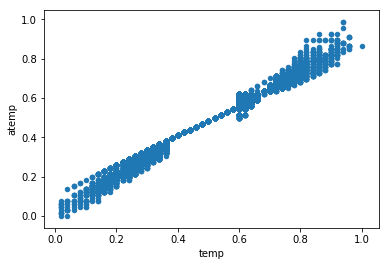

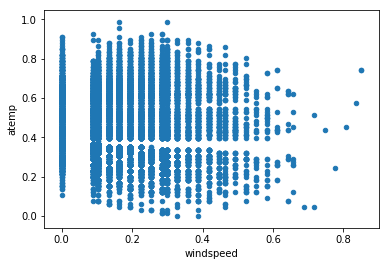

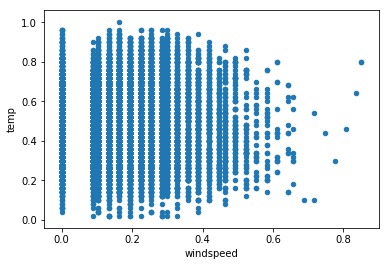

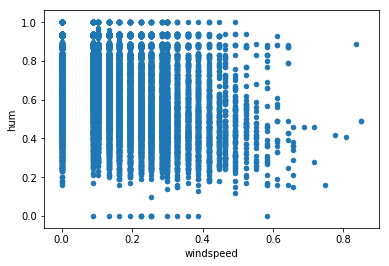

In [191]:
tempAndAtemp = train[['temp', 'atemp']]
tempAndAtemp.plot.scatter(x = 'temp', y = 'atemp')

windspeedAndAtemp = train[['windspeed', 'atemp']]
windspeedAndAtemp.plot.scatter(x = 'windspeed', y = 'atemp')

windspeedAndtemp = train[['windspeed', 'temp']]
windspeedAndtemp.plot.scatter(x = 'windspeed', y = 'temp')

windspeedAndhum = train[['windspeed', 'hum']]
windspeedAndhum.plot.scatter(x = 'windspeed', y = 'hum')

In [192]:
train_set, test_set = train_test_split(train, test_size = 0.3, random_state = 42)

x_train = train_set.drop('cnt', axis = 1)
y_train = train_set.cnt

x_test = test_set.drop('cnt', axis = 1)
y_test = test_set.cnt

In [ ]:
rf_model = RandomForestRegressor(n_estimators = 1000, max_features=8, n_jobs = -1)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

print("Cross Validated Score:", np.mean(cross_val_score(rf_model, x_train, y_train, cv = 10)), '\n')
print(rf_model.feature_importances_)

In [172]:
test.loc[test.temp - test.atemp >= 0.3, 'atemp'] = test.temp

In [173]:
full_set = train.copy()

x_full = full_set.drop('cnt', axis = 1)
y_full = full_set.cnt

rf_model.fit(x_full, y_full)

y_solution_predict = np.round(rf_model.predict(test))

print(y_solution_predict, '\n')

solution['cnt'] = y_solution_predict

solution['cnt'] = solution['cnt'].astype('int')

solution_full = test.copy();

solution_full['cnt'] = y_solution_predict

solution_full['cnt'] = solution_full['cnt'].astype('int')

[  4. 197. 177. ...   8. 129. 429.] 



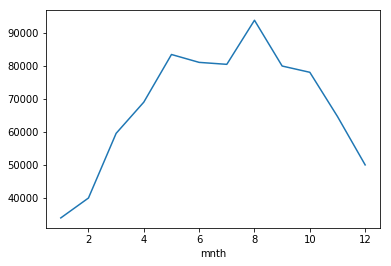

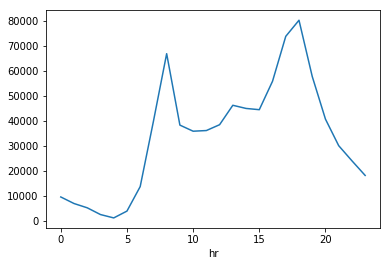

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,4,10,3,0,2,1,1,0.44,0.4394,0.94,0.0896,4
1,1,2,9,0,3,1,1,0.18,0.2121,0.51,0.0896,197
2,2,3,12,0,6,0,1,0.30,0.2879,0.36,0.1940,177
3,4,10,3,0,0,0,2,0.44,0.4394,0.62,0.1343,39
4,1,3,21,0,3,1,1,0.34,0.2879,0.29,0.4627,110


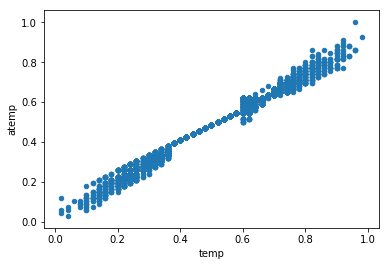

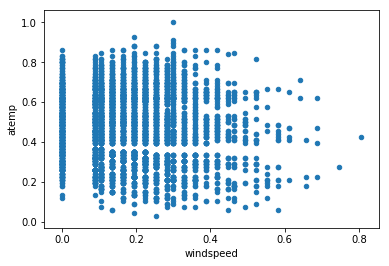

In [174]:
solution_full.groupby('mnth').cnt.sum().plot()
plt.show()

solution_full.groupby('hr').cnt.sum().plot()
plt.show()

tempAndAtemp = solution_full[['temp', 'atemp']]
tempAndAtemp.plot.scatter(x = 'temp', y = 'atemp')

tempAndAtemp = solution_full[['windspeed', 'atemp']]
tempAndAtemp.plot.scatter(x = 'windspeed', y = 'atemp')

solution_full.head()

In [175]:
solution.to_csv('data/solution.csv', index = False )